In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "july-trip-data" "trip-data"

Start

# ASK

Add questions blah blah


# PREPARE

* import dataset
* summarize dataset
* add needed columns


In [2]:
library(readr)
cycle_trip <- read_csv("../input/july-trip-data/202107-divvy-tripdata.csv")



── Column specification ────────────────────────────────────────────────────────
cols(
  ride_id = col_character(),
  rideable_type = col_character(),
  started_at = col_datetime(format = ""),
  ended_at = col_datetime(format = ""),
  start_station_name = col_character(),
  start_station_id = col_character(),
  end_station_name = col_character(),
  end_station_id = col_character(),
  start_lat = col_double(),
  start_lng = col_double(),
  end_lat = col_double(),
  end_lng = col_double(),
  member_casual = col_character()
)




In [3]:
head(cycle_trip)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.88398,-87.62468,41.89937,-87.64848,casual
B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.90036,-87.69670,41.88990,-87.67147,casual
6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.86038,-87.62581,41.89017,-87.62619,member
379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.90036,-87.69670,41.89456,-87.65345,member
6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.90035,-87.69668,41.88659,-87.65839,casual
62DC2B32872F9BA8,electric_bike,2021-07-29 17:09:08,2021-07-29 17:15:00,California Ave & Cortez St,17660,Albany Ave & Bloomingdale Ave,15655,41.90033,-87.69674,41.91389,-87.70513,casual


In [4]:
cycle_trip <- cycle_trip %>%
mutate(ride_time_m = as.numeric(cycle_trip$ended_at - cycle_trip$started_at) / 60)

summary(cycle_trip$ride_time_m)


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   -0.20     7.58    13.35    24.21    23.73 49107.15 

In [5]:
cycle_trip <- cycle_trip %>%
    mutate(weekday = paste(strftime(cycle_trip$ended_at, "%u"), "-", strftime(cycle_trip$ended_at, "%a")))
unique(cycle_trip$weekday)

[1] "5 - Fri" "3 - Wed" "7 - Sun" "4 - Thu" "6 - Sat" "1 - Mon" "2 - Tue"

Cleaned and Processed Dataset

In [6]:
head(cycle_trip)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time_m,weekday
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.88398,-87.62468,41.89937,-87.64848,casual,35.366667,5 - Fri
B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.90036,-87.69670,41.88990,-87.67147,casual,18.450000,3 - Wed
6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.86038,-87.62581,41.89017,-87.62619,member,17.833333,7 - Sun
379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.90036,-87.69670,41.89456,-87.65345,member,15.033333,4 - Thu
6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.90035,-87.69668,41.88659,-87.65839,casual,19.050000,3 - Wed
62DC2B32872F9BA8,electric_bike,2021-07-29 17:09:08,2021-07-29 17:15:00,California Ave & Cortez St,17660,Albany Ave & Bloomingdale Ave,15655,41.90033,-87.69674,41.91389,-87.70513,casual,5.866667,4 - Thu


In [7]:
#fig <- function(width, heigth){options(repr.plot.width = width, repr.plot.height = heigth)}

In [8]:
summary(cycle_trip)

   ride_id          rideable_type        started_at                 
 Length:822410      Length:822410      Min.   :2021-07-01 00:00:22  
 Class :character   Class :character   1st Qu.:2021-07-08 17:44:35  
 Mode  :character   Mode  :character   Median :2021-07-17 13:58:37  
                                       Mean   :2021-07-16 22:23:15  
                                       3rd Qu.:2021-07-24 18:23:39  
                                       Max.   :2021-07-31 23:59:58  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2021-07-01 00:04:51   Length:822410      Length:822410     
 1st Qu.:2021-07-08 18:02:01   Class :character   Class :character  
 Median :2021-07-17 14:28:04   Mode  :character   Mode  :character  
 Mean   :2021-07-16 22:47:28                                        
 3rd Qu.:2021-07-24 18:46:20                                        
 Max.   :2021-08-12 17:45:41      

# PROCESS

* Check for outliers
* Clean dataset 
* Summarize cleaned dataset


In [9]:
summary(cycle_trip$ride_time_m)


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   -0.20     7.58    13.35    24.21    23.73 49107.15 

The Min is less than 0. That means there is some discripancy in the dataset.The min and the max may be a problem to plot some charts. How the ride time of some bikes is a negative value? Maybe there's some malfunction stations return bad dates. Checking the start and end stations doesn't appear to have a problem.


In [10]:
ventiles = quantile(cycle_trip$ride_time_m, seq(0, 1, by=0.02))
ventiles

0%           2%           4%           6%           8%          10% 
   -0.200000     1.483333     2.633333     3.350000     3.916667     4.416667 
         12%          14%          16%          18%          20%          22% 
    4.883333     5.333333     5.766667     6.166667     6.566667     6.983333 
         24%          26%          28%          30%          32%          34% 
    7.383333     7.783333     8.200000     8.616667     9.033333     9.466667 
         36%          38%          40%          42%          44%          46% 
    9.900000    10.350000    10.800000    11.283333    11.766667    12.266667 
         48%          50%          52%          54%          56%          58% 
   12.800000    13.350000    13.916667    14.516667    15.150000    15.816667 
         60%          62%          64%          66%          68%          70% 
   16.516667    17.266667    18.066667    18.933333    19.850000    20.833333 
         72%          74%          76%          78%          80%          82% 
   21.916667    23.116667    24.416667    25.850000    27.433333    29.233333 
         84%          86%          88%          90%          92%          94% 
   31.316667    33.866667    37.066667    41.150000    46.766667    55.850000 
         96%          98%         100% 
   71.116667   102.750000 49107.150000

*Getting rid off the outliers*

In [11]:
cycle_trip_clean <- cycle_trip %>% 
    filter(ride_time_m > as.numeric(ventiles['2%'])) %>%
    filter(ride_time_m < as.numeric(ventiles['98%']))

print(paste("Removed", nrow(cycle_trip) - nrow(cycle_trip_clean), "rows as outliners" ))

[1] "Removed 33007 rows as outliners"


In [12]:
summary(cycle_trip_clean)

   ride_id          rideable_type        started_at                 
 Length:789403      Length:789403      Min.   :2021-07-01 00:00:22  
 Class :character   Class :character   1st Qu.:2021-07-08 18:10:53  
 Mode  :character   Mode  :character   Median :2021-07-17 14:01:56  
                                       Mean   :2021-07-16 22:46:48  
                                       3rd Qu.:2021-07-24 18:25:35  
                                       Max.   :2021-07-31 23:59:58  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2021-07-01 00:04:51   Length:789403      Length:789403     
 1st Qu.:2021-07-08 18:26:42   Class :character   Class :character  
 Median :2021-07-17 14:25:55   Mode  :character   Mode  :character  
 Mean   :2021-07-16 23:05:09                                        
 3rd Qu.:2021-07-24 18:43:47                                        
 Max.   :2021-08-01 01:10:27      

# ANALYZE

* Compare different parameters
* Find usage pattern
* Member vs Casual Rider Comparison

1. Casual vs Member Riders


In [13]:
cycle_trip_clean%>% 
    group_by(member_casual) %>% 
    summarise(count = length(ride_id),
              '%' = (length(ride_id) / nrow(cycle_trip_clean)) * 100)

member_casual,count,%
<chr>,<int>,<dbl>
casual,418811,53.05414
member,370592,46.94586


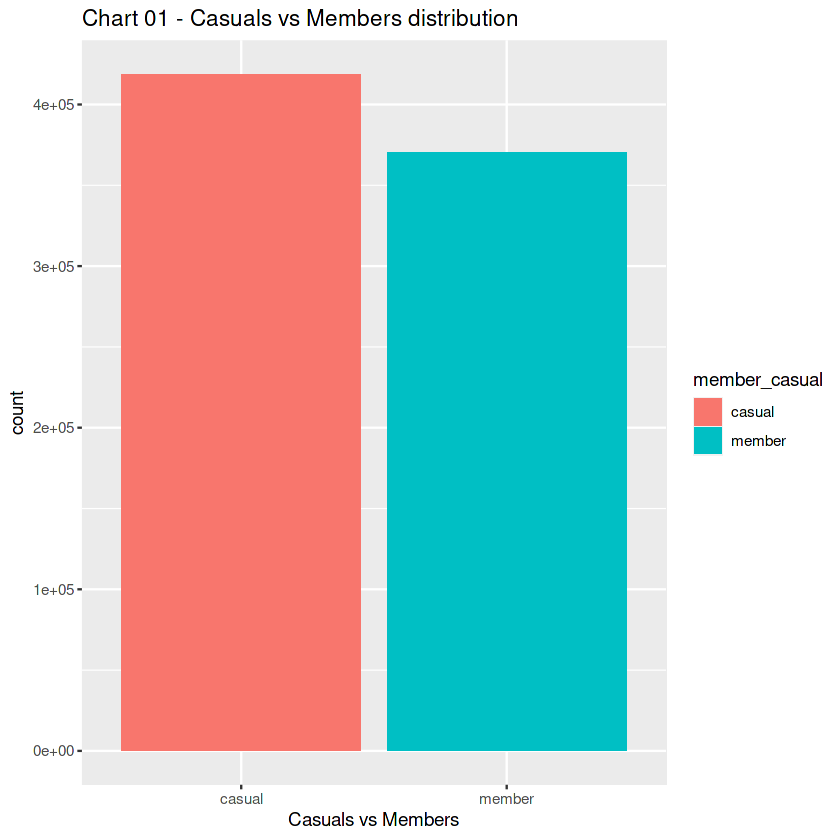

In [14]:
ggplot(cycle_trip_clean, aes(member_casual, fill=member_casual)) +
    geom_bar() +
    labs(x="Casuals vs Members", title="Chart 01 - Casuals vs Members distribution")

2. Member vs Casual Rider distribution as per weekdays

In [15]:
cycle_trip_clean %>%
    group_by(weekday) %>% 
    summarise(count = length(ride_id),
              '%' = (length(ride_id) / nrow(cycle_trip_clean)) * 100,
              'member_n'= (sum(member_casual == "member")),
              'casual_n'= (sum(member_casual == "casual")),
              'member_p' = (sum(member_casual == "member") / length(ride_id)) * 100,
              'casual_p' = (sum(member_casual == "casual") / length(ride_id)) * 100,
              'Member vs Casual Percent Difference' = member_p - casual_p)

weekday,count,%,member_n,casual_n,member_p,casual_p,Member vs Casual Percent Difference
<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1 - Mon,91116,11.54239,45320,45796,49.73879,50.26121,-0.522411
2 - Tue,94313,11.94738,51120,43193,54.20250,45.79750,8.404992
3 - Wed,96827,12.26585,52322,44505,54.03658,45.96342,8.073161
4 - Thu,116989,14.81993,62789,54200,53.67086,46.32914,7.341716
5 - Fri,130399,16.51869,62391,68008,47.84623,52.15377,-4.307548
6 - Sat,154813,19.61140,57834,96979,37.35733,62.64267,-25.285344
7 - Sun,104946,13.29435,38816,66130,36.98664,63.01336,-26.026719


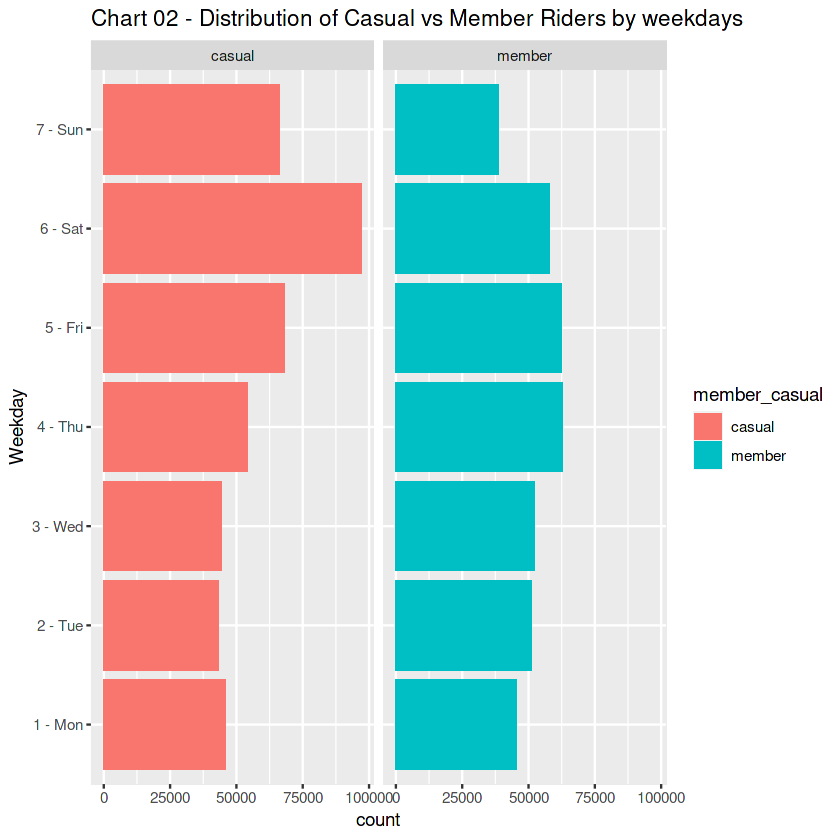

In [16]:
ggplot(cycle_trip_clean, aes(weekday, fill=member_casual)) +
    geom_bar() +
    labs(x="Weekday", title="Chart 02 - Distribution of Casual vs Member Riders by weekdays")+
facet_wrap(~member_casual)+
coord_flip()

3. Use of different types of rides

In [17]:
cycle_trip_clean %>% 
    group_by(rideable_type) %>% 
    summarise(count = length(ride_id),
              '%' = (length(ride_id) / nrow(cycle_trip_clean)) * 100)

rideable_type,count,%
<chr>,<int>,<dbl>
classic_bike,490089,62.083499
docked_bike,50954,6.454751
electric_bike,248360,31.461750


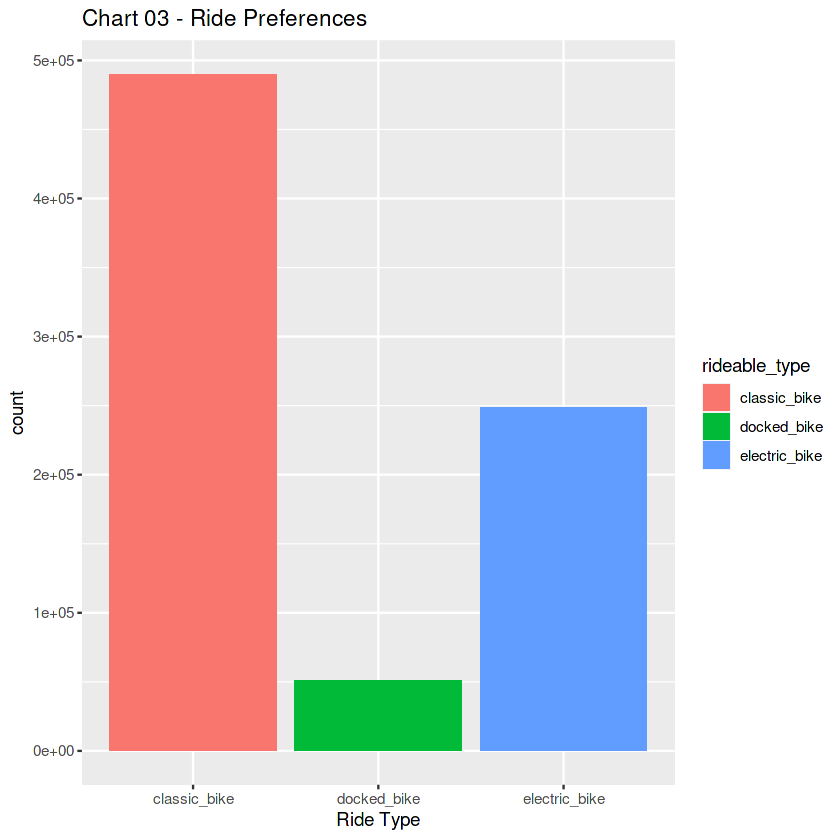

In [18]:
ggplot(cycle_trip_clean, aes(rideable_type, fill=rideable_type)) +
    geom_bar() +
    labs(x="Ride Type", title="Chart 03 - Ride Preferences")

4. Casual vs Member distribution based on type of ride

In [19]:
cycle_trip_clean %>%
    group_by(rideable_type) %>% 
    summarise(count = length(ride_id),
          '%' = (length(ride_id) / nrow(cycle_trip_clean)) * 100,
          'members_n'= (sum(member_casual == "member")),
          'casuals_n'= (sum(member_casual == "casual")),
          'members_p'= (sum(member_casual == "member") / length(ride_id)) * 100,
          'casual_p' = (sum(member_casual == "casual") / length(ride_id)) * 100,
          'member_casual_percent_difference' = members_p - casual_p)

rideable_type,count,%,members_n,casuals_n,members_p,casual_p,member_casual_percent_difference
<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
classic_bike,490089,62.083499,259242,230847,52.89692,47.10308,5.793846
docked_bike,50954,6.454751,0,50954,0.00000,100.00000,-100.000000
electric_bike,248360,31.461750,111350,137010,44.83411,55.16589,-10.331776


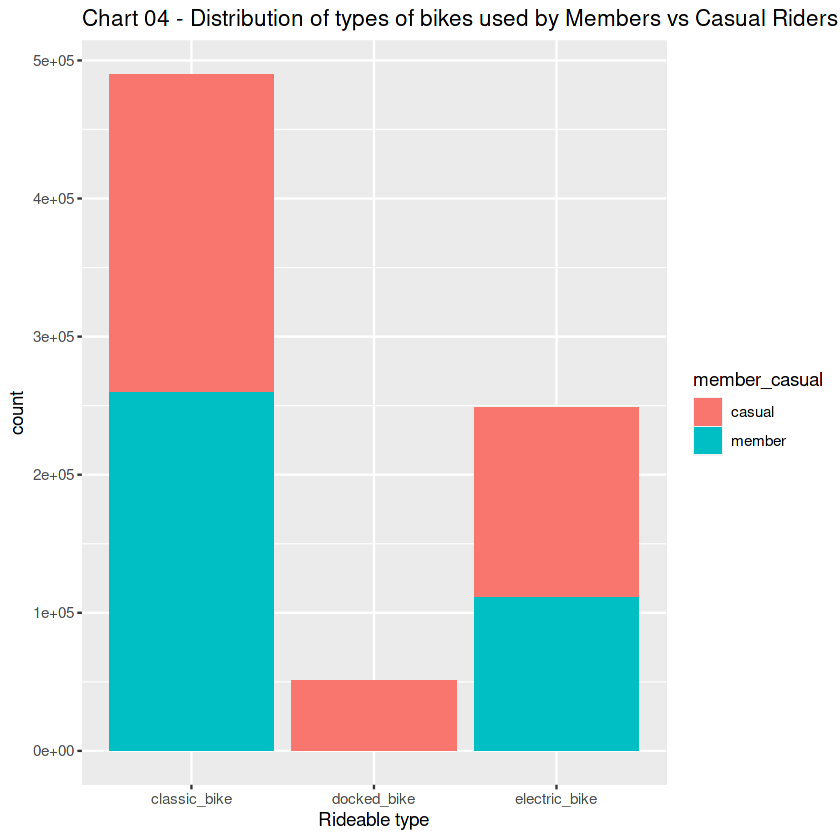

In [20]:
ggplot(cycle_trip_clean, aes(rideable_type, fill=member_casual)) +
    labs(x="Rideable type", title="Chart 04 - Distribution of types of bikes used by Members vs Casual Riders") +
    geom_bar()

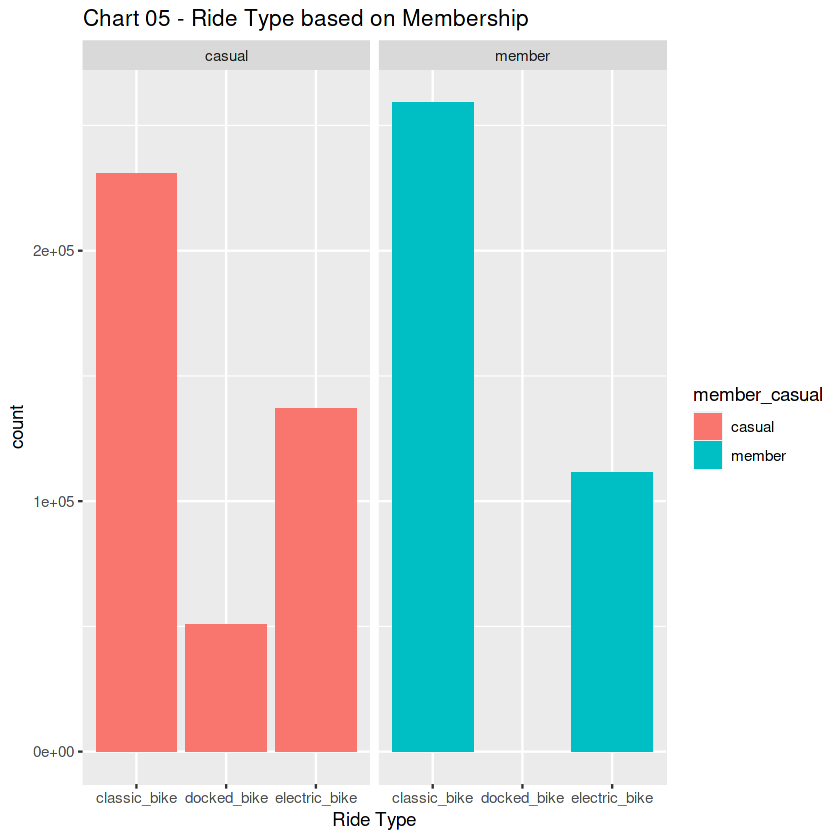

In [21]:
cycle_trip_clean %>%
    ggplot(aes(rideable_type, fill=member_casual)) +
    geom_bar() +
    labs(x="Ride Type", title="Chart 05 - Ride Type based on Membership ") +
    facet_wrap(~ member_casual)

5. Distribution of Riding time for Casual vs Member Riders

In [22]:
cycle_trip_clean %>%
    group_by(member_casual) %>% 
    summarise(count = length(ride_id),
          '%' = (length(ride_id) / nrow(cycle_trip_clean)) * 100,
          'ridetime'= (mean(ride_time_m)))
          

member_casual,count,%,ridetime
<chr>,<int>,<dbl>,<dbl>
casual,418811,53.05414,22.42893
member,370592,46.94586,13.76188


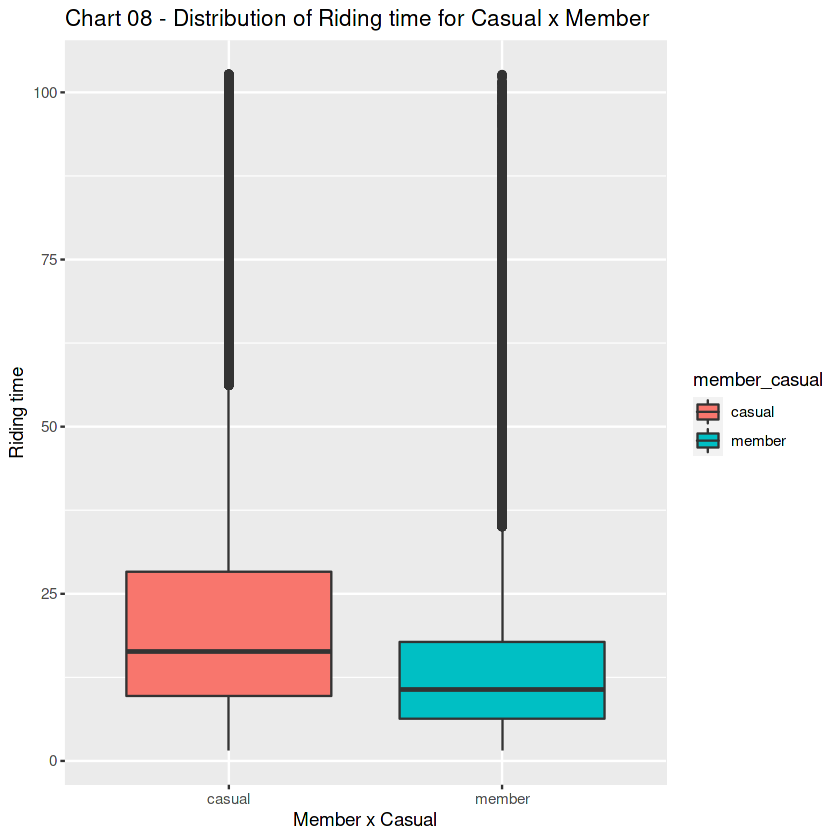

In [23]:
ggplot(cycle_trip_clean, aes(x=member_casual, y=ride_time_m, fill=member_casual)) +
    labs(x="Member x Casual", y="Riding time", title="Chart 08 - Distribution of Riding time for Casual x Member") +
    geom_boxplot()

In [24]:
cycle_trip_clean %>%
    group_by(rideable_type) %>% 
    summarise(count = length(ride_id),
          'Percent of users' = (length(ride_id) / nrow(cycle_trip_clean)) * 100,
           'member_n'= (sum(member_casual == "member")),
           'casual_n'= (sum(member_casual == "casual")),   
           'ridetime'= (mean(ride_time_m)),
            'member - casual Percent Difference' = ((member_n - casual_n) / length(ride_id))*100)
          

rideable_type,count,Percent of users,member_n,casual_n,ridetime,member - casual Percent Difference
<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>
classic_bike,490089,62.083499,259242,230847,17.55013,5.793846
docked_bike,50954,6.454751,0,50954,32.76930,-100.000000
electric_bike,248360,31.461750,111350,137010,17.00223,-10.331776


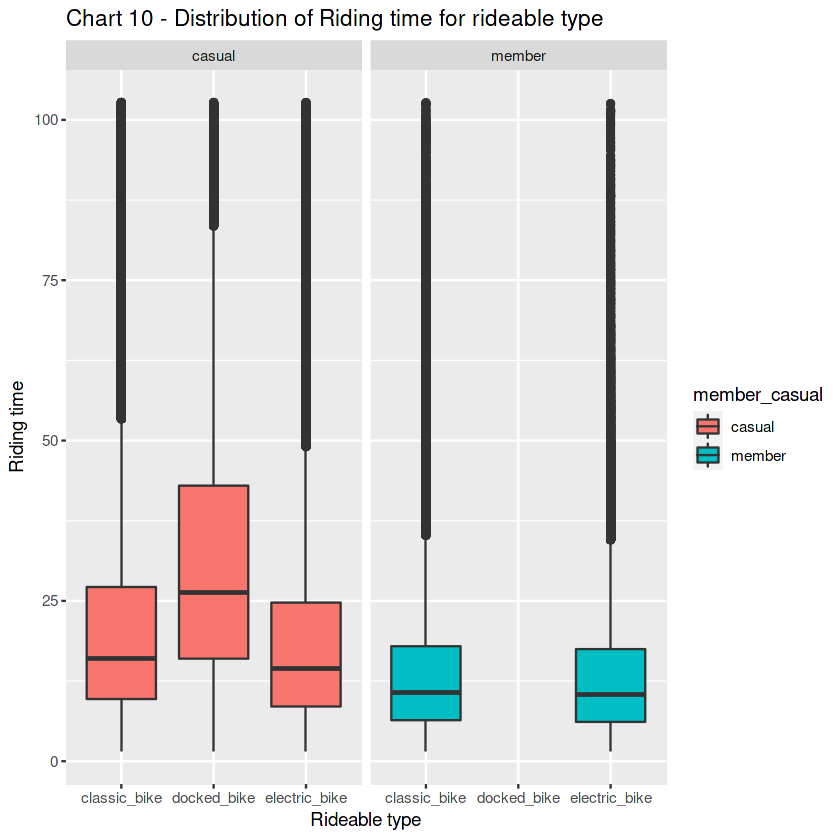

In [25]:
ggplot(cycle_trip_clean, aes(x=rideable_type, y=ride_time_m, fill=member_casual)) +
    geom_boxplot() +
    facet_wrap(~ member_casual) +
    labs(x="Rideable type", y="Riding time", title="Chart 10 - Distribution of Riding time for rideable type") 

# SHARE

# ACT